In [1]:

# Set up notebook
%pprint
%matplotlib inline
import sys
import os.path as osp, os as os

executable_path = sys.executable
scripts_folder = osp.join(osp.dirname(executable_path), 'Scripts'); assert osp.exists(scripts_folder)
py_folder = osp.abspath(osp.join(os.pardir, 'py')); assert osp.exists(py_folder), "Create the py folder"
ffmpeg_folder = r'C:\ffmpeg\bin'; assert osp.exists(ffmpeg_folder)
shared_folder = osp.abspath(osp.join(os.pardir, 'share')); assert osp.exists(shared_folder)

if (scripts_folder not in sys.path): sys.path.insert(1, scripts_folder)
if (py_folder not in sys.path): sys.path.insert(1, py_folder)
if (ffmpeg_folder not in sys.path): sys.path.insert(1, ffmpeg_folder)
if shared_folder not in sys.path: sys.path.insert(1, shared_folder)

from notebook_utils import NotebookUtilities
nu = NotebookUtilities(
    data_folder_path=osp.abspath(osp.join(os.pardir, 'data')),
    saves_folder_path=osp.abspath(osp.join(os.pardir, 'saves'))
)
nu.delete_ipynb_checkpoint_folders()

# Import needed libraries
import re
import pandas as pd
import pyperclip
import ipywidgets as widgets
from IPython.display import display
import inspect

Pretty printing has been turned OFF
\b(BaseConfig|SequenceAnalysis|Series|__builtins__|__cached__|__doc__|__file__|__loader__|__name__|__package__|__spec__|display|makedirs|np|os|osp|pd|plt|sub)\b


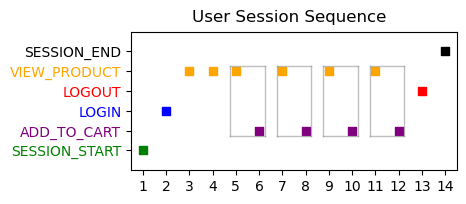

In [3]:

# Create a standard sequence plot where each element corresponds to a position on the y-axis
import matplotlib.pyplot as plt
import random

# Define the sequence of user actions
sequence = ["SESSION_START", "LOGIN", "VIEW_PRODUCT"]

# Generate more shopping elements
for _ in range(9):
    if sequence[-1] != 'ADD_TO_CART':
        sequence.append(random.choice(['VIEW_PRODUCT', 'ADD_TO_CART']))
    else:
        sequence.append('VIEW_PRODUCT')

# Finish up the shopping
sequence += ["LOGOUT", "SESSION_END"]

# Define n-grams to highlight
highlighted_ngrams = [["VIEW_PRODUCT", "ADD_TO_CART"]]

# Define a custom color dictionary for the actions
color_dict = {
    "SESSION_START": "green",
    "LOGIN": "blue",
    "VIEW_PRODUCT": "orange",
    "ADD_TO_CART": "purple",
    "LOGOUT": "red",
    "SESSION_END": "black"
}

# Plot the sequence
fig, ax = nu.plot_sequence(
    sequence=sequence,
    highlighted_ngrams=highlighted_ngrams,
    color_dict=color_dict,
    suptitle="User Session Sequence",
    verbose=False
)

# Show the plot
plt.show()

In [7]:

import random

random.choices(['ADD_TO_CART', 'VIEW_PRODUCT'], k=9)

['ADD_TO_CART', 'ADD_TO_CART', 'VIEW_PRODUCT', 'ADD_TO_CART', 'ADD_TO_CART', 'ADD_TO_CART', 'ADD_TO_CART', 'ADD_TO_CART', 'ADD_TO_CART']

In [62]:

# Standardize all the various load magics in the GitHub folder
from itertools import combinations
import subprocess
import glob

paths_list = [osp.abspath(f) for f in glob.glob('../../*/load_magic/s_dir.txt', recursive=True)]
paths_list

['C:\\Users\\daveb\\OneDrive\\Documents\\GitHub\\MineCraft\\load_magic\\s_dir.txt', 'C:\\Users\\daveb\\OneDrive\\Documents\\GitHub\\notebooks\\load_magic\\s_dir.txt', 'C:\\Users\\daveb\\OneDrive\\Documents\\GitHub\\rpc\\load_magic\\s_dir.txt', 'C:\\Users\\daveb\\OneDrive\\Documents\\GitHub\\Strauss-Howe\\load_magic\\s_dir.txt', 'C:\\Users\\daveb\\OneDrive\\Documents\\GitHub\\Twitter\\load_magic\\s_dir.txt']

In [56]:

# Get all unique pairs (order doesn't matter)
pairs = combinations(paths_list, 2)

# Iterate through pairs and compare them
comparator_path = r"C:\Program Files (x86)\Compare It!\wincmp3.exe"
for pair in pairs:
    # print(pair)
    subprocess.run([comparator_path, pair[0], pair[1]])

In [63]:

for file_path in paths_list:
    print(file_path)
    os.remove(file_path)

C:\Users\daveb\OneDrive\Documents\GitHub\MineCraft\load_magic\s_dir.txt
C:\Users\daveb\OneDrive\Documents\GitHub\notebooks\load_magic\s_dir.txt
C:\Users\daveb\OneDrive\Documents\GitHub\rpc\load_magic\s_dir.txt
C:\Users\daveb\OneDrive\Documents\GitHub\Strauss-Howe\load_magic\s_dir.txt
C:\Users\daveb\OneDrive\Documents\GitHub\Twitter\load_magic\s_dir.txt


In [35]:

# Find all the OS Path Navigation notebooks in the ipynb folders of my repos
pushables_list = nu.load_object('pushables_list')
ipynb_paths = [osp.join(file_path, 'ipynb') for file_path in pushables_list]
file_name = 'OS Path Navigation.ipynb'
file_paths_list = []
for parent_directory in ipynb_paths:
    if osp.isdir(parent_directory):
        for old_file_name in os.listdir(parent_directory):
            if old_file_name == file_name:
                old_file_path = os.path.join(parent_directory, old_file_name)
                file_paths_list.append(old_file_path)
for file_path in file_paths_list:
    print(file_path)

C:\Users\daveb\OneDrive\Documents\GitHub\covid19\ipynb\OS Path Navigation.ipynb
C:\Users\daveb\OneDrive\Documents\GitHub\itm-analysis-reporting-1\ipynb\OS Path Navigation.ipynb
C:\Users\daveb\OneDrive\Documents\GitHub\job-hunting\ipynb\OS Path Navigation.ipynb
C:\Users\daveb\OneDrive\Documents\GitHub\mimetic_tribes\ipynb\OS Path Navigation.ipynb
C:\Users\daveb\OneDrive\Documents\GitHub\notebooks\ipynb\OS Path Navigation.ipynb
C:\Users\daveb\OneDrive\Documents\GitHub\rpc\ipynb\OS Path Navigation.ipynb
C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\ipynb\OS Path Navigation.ipynb
C:\Users\daveb\OneDrive\Documents\GitHub\StatsByUSState\ipynb\OS Path Navigation.ipynb
C:\Users\daveb\OneDrive\Documents\GitHub\Strauss-Howe\ipynb\OS Path Navigation.ipynb
C:\Users\daveb\OneDrive\Documents\GitHub\transcriptions-notebook\ipynb\OS Path Navigation.ipynb


In [4]:

[f'nu.{fn}' for fn in dir(nu) if 'encod' in fn]

['nu.encode', 'nu.encoding_error', 'nu.encoding_errors_list', 'nu.encoding_type', 'nu.encoding_types_list', 'nu.one_hot_encode']

In [6]:

set([f'nu.{fn}' for fn in dir(nu.uncategorized) if any(map(lambda x: x in fn, ['folder', 'dir']))]).difference(
    set([f'nu.{fn}' for fn in dir(nu) if any(map(lambda x: x in fn, ['folder', 'dir']))])
)

set()

In [7]:

set([f'nu.{fn}' for fn in dir(nu) if any(map(lambda x: x in fn, ['folder', 'dir']))]).difference(
    set([f'nu.{fn}' for fn in dir(nu.uncategorized) if any(map(lambda x: x in fn, ['folder', 'dir']))])
)

{'nu.list_dfs_in_folder', 'nu.delete_ipynb_checkpoint_folders', 'nu.get_dir_tree'}

In [8]:

nu.__dir__()

['__add__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_staticmethod_decorations', 'anaconda_folder', 'apply_multilevel_numbering', 'attempt_to_pickle', 'bin_folder', 'cache_folder', 'capitalize', 'casefold', 'center', 'check_4_doubles', 'check_for_typos', 'color_distance_from', 'comment_regex', 'compute_similarity', 'conjunctify_nouns', 'convert_strings_to_integers', 'convert_to_data_frame', 'convert_to_df', 'count', 'count_ngrams', 'count_swaps_to_perfect_order', 'csv_exists', 'data_analysis', 'data_csv_folder', 'data_folder', 'data_model

In [20]:

# Show the requirements.txt path
osp.abspath(osp.join(nu.github_folder, os.pardir, 'share', 'requirements.txt'))

'C:\\Users\\daveb\\OneDrive\\Documents\\GitHub\\share\\requirements.txt'

In [33]:

print([f'os.{fn}' for fn in dir(os) if 'list' in fn])

['os._get_exports_list', 'os.listdir']


In [27]:

# Get the repositories directory by various means, with increasing conciseness
print([f'os.{fn}' for fn in dir(os) if ('path' in fn) and (len(f'os.{fn}') < len('osp.abspath'))])
print([f'osp.{fn}' for fn in dir(osp) if ('path' in fn) and (len(f'osp.{fn}') < len('osp.abspath'))])
print(osp.abspath(osp.join(os.curdir, os.pardir, os.pardir)))
print(osp.abspath(osp.join(nu.github_folder, os.pardir)))
print(osp.dirname(osp.dirname(osp.abspath(os.curdir))))
print(osp.dirname(nu.github_folder))

['os._fspath', 'os.defpath', 'os.fspath', 'os.path', 'os.pathsep']
[]
C:\Users\daveb\OneDrive\Documents\GitHub
C:\Users\daveb\OneDrive\Documents\GitHub
C:\Users\daveb\OneDrive\Documents\GitHub
C:\Users\daveb\OneDrive\Documents\GitHub


In [15]:

# Find all the notebooks with the word "color" in their file name
black_list = ['.ipynb_checkpoints', '$Recycle.Bin']
folder_path = '../../color/ipynb'
ascii_regex = re.compile(r'[^A-Za-z0-9]+')
file_ending = '.ipynb'
file_paths_list = []
for root_dir in ['C:\\', 'D:\\']:
    for parent_directory, child_directories, files_list in os.walk(root_dir):
        if all(map(lambda x: x not in parent_directory, black_list)):
            for old_file_name in files_list:
                if old_file_name.endswith(file_ending) and ('color' in old_file_name.lower()):
                    old_file_path = os.path.join(parent_directory, old_file_name)
                    file_paths_list.append(old_file_path)

In [24]:

# Copy all the notebook files with the word "color" in their name to the color repo
import shutil

for old_file_path in file_paths_list:
    new_file_name = ascii_regex.sub('_', osp.relpath(old_file_path, osp.abspath(folder_path)).replace(file_ending, '').lstrip('.\\')) + file_ending
    new_file_path = osp.abspath(osp.join(folder_path, new_file_name))
    # shutil.copy(old_file_path, new_file_path)

In [ ]:

# Open a file with a relative path in Notepad++
file_path = '../data/txt/resume.txt'
nu.open_path_in_notepad(file_path)

In [ ]:

# Show the location of all the files with "hair" in the name
black_list = ['.ipynb_checkpoints', '$Recycle.Bin']
# walk_folder = osp.dirname(nu.github_folder)
for parent_directory, child_directories, files_list in os.walk('C:\\'):
    if all(map(lambda x: x not in parent_directory, black_list)):
        for file_name in files_list:
            if ('hair' in file_name):
                file_path = osp.join(parent_directory, file_name)
                print(file_path)

In [4]:

# Show the location of all the resume in Microsoft Word form
for parent_directory, child_directories, files_list in os.walk('C:\\'):
    for file_name in files_list:
        if file_name.endswith('.docx') and ('resume' in file_name.lower()):
            file_path = osp.join(parent_directory, file_name)
            if osp.isfile(file_path):
                print(f'{file_path}')

C:\Users\daveb\OneDrive\Documents\Babbitt Stuff\Jay_s Junk\Jay-Babbitt_Resume.docx
C:\Users\daveb\OneDrive\Documents\Google Drive\Other\Job Hunting\Dave_Babbitt_Resume (1).docx
C:\Users\daveb\OneDrive\Documents\Google Drive\Other\Job Hunting\Dave_Babbitt_Resume.docx
C:\Users\daveb\OneDrive\Documents\Google Drive\Other\Job Hunting\Dave_Babbitt_Resume_Cold_Fusion_Developer.docx
C:\Users\daveb\OneDrive\Documents\Google Drive\Other\Job Hunting\Dave_Babbitt_Resume_Delivery_Driver.docx
C:\Users\daveb\OneDrive\Documents\Google Drive\Other\Job Hunting\Dave_Babbitt_Resume_Jr._Java_Developer.docx
C:\Users\daveb\OneDrive\Documents\Google Drive\Other\Job Hunting\Dave_Babbitt_Resume_Predictive_Analyst.docx
C:\Users\daveb\OneDrive\Documents\Google Drive\Other\Job Hunting\Dave_Babbitt_Resume_QA_Tester.docx
C:\Users\daveb\OneDrive\Documents\Google Drive\Other\Job Hunting\Dave_Babbitt_Resume_Reactor_Operator.docx
C:\Users\daveb\OneDrive\Documents\Google Drive\Other\Job Hunting\Dave_Babbitt_Resume_Resea